# Data Preprocessing

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [ ]:
dataset = pd.read_csv('AmazOn-User-Segmentation.csv')
X = dataset.iloc[:, 3:5].values

FileNotFoundError: ignored

In [ ]:
print(X)

[[ 306555      44]
 [ 306555      91]
 [ 326992       7]
 [ 326992      87]
 [ 347429      45]
 [ 347429      86]
 [ 367866       7]
 [ 367866     106]
 [ 388303       4]
 [ 388303      81]
 [ 388303      16]
 [ 388303     111]
 [ 408740      17]
 [ 408740      87]
 [ 408740      15]
 [ 408740      89]
 [ 429177      40]
 [ 429177      74]
 [ 470051      33]
 [ 470051     110]
 [ 490488      40]
 [ 490488      82]
 [ 510925       6]
 [ 510925      82]
 [ 572236      16]
 [ 572236      92]
 [ 572236      36]
 [ 572236      69]
 [ 592673      35]
 [ 592673      98]
 [ 613110       5]
 [ 613110      82]
 [ 674421       5]
 [ 674421     104]
 [ 674421      16]
 [ 674421      91]
 [ 694858      20]
 [ 694858      82]
 [ 756169      30]
 [ 756169      84]
 [ 776606      40]
 [ 776606     104]
 [ 797043      41]
 [ 797043      69]
 [ 797043      32]
 [ 797043      73]
 [ 817480      62]
 [ 817480      53]
 [ 817480      48]
 [ 817480      48]
 [ 858354      59]
 [ 858354      68]
 [ 878791   




## Handling Missing Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

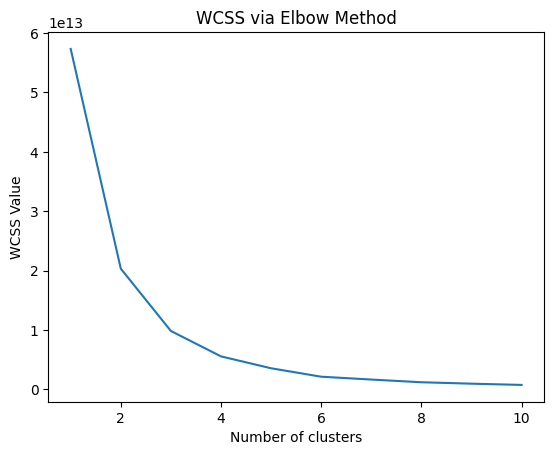

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state=21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')

plt.show()

## Encoding Categorical Data

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_means)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Encoding independent variables

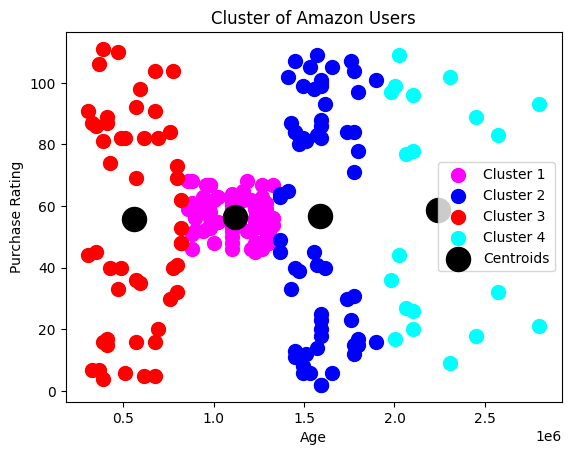

In [ ]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0,1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2,1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Cluster of Amazon Users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()



### Encoding dependent variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

## Splitting data into Test set & Training Set


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 6:] = sc.fit_transform(X_train[:, 6:])
X_test[:, 6:] = sc.fit_transform(X_test[:, 6:])

In [ ]:
print(X_train)